In [1]:
##DATA PREPROCESSING##

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv(r'F:\OneDrive - University of Hertfordshire\23067350_MSc_LoanDefaultProject\Dataset\Loan_default.csv')

# Drop ID column
df = df.drop(columns=['LoanID'])

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical features (excluding target 'Default')
num_cols = df.drop(columns=['Default']).select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = StandardScaler().fit_transform(df[num_cols])

# Final preprocessed data
print(df.head())


        Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.833990  0.089693   -1.086833    -0.341492        0.590533   
1  1.701221 -0.823021   -0.044309    -0.731666       -1.285731   
2  0.166888  0.043854    0.022715    -0.775718       -0.968209   
3 -0.767053 -1.303452   -1.168538     1.061875       -1.718715   
4  1.100830 -1.592855   -1.671921     0.369631       -1.487790   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0        1.341937      0.261771 -0.001526 -0.260753          0   
1       -1.343791     -1.308350  1.412793  0.778585          2   
2        0.446694      1.156831 -0.708685 -0.823728          2   
3        0.446694     -0.967805 -0.708685 -1.170174          1   
4        1.341937     -1.052188  0.705634  0.995114          0   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               0              0            1              1            4   
1               0              1            0       

Data Shape: (255347, 17)
Default Rate:
 Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64


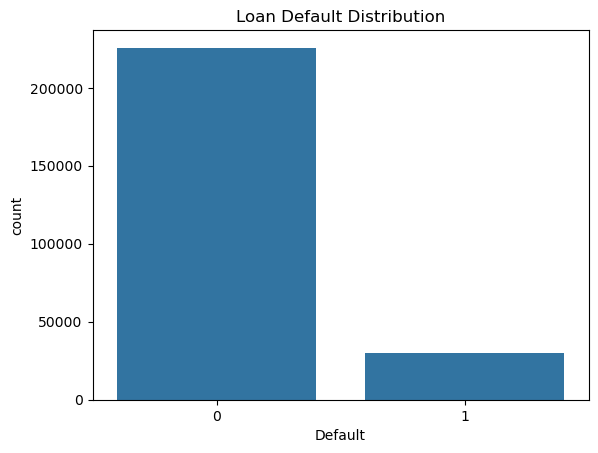

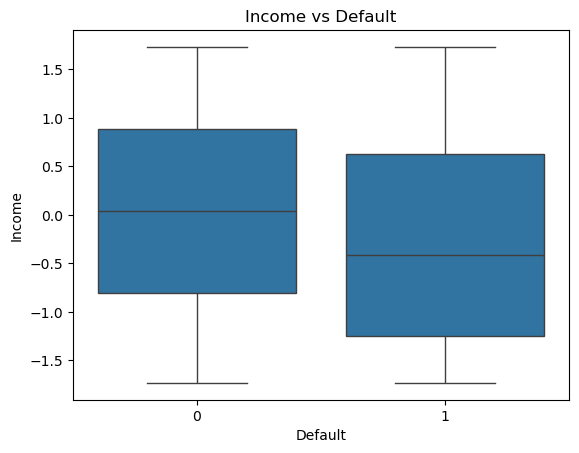

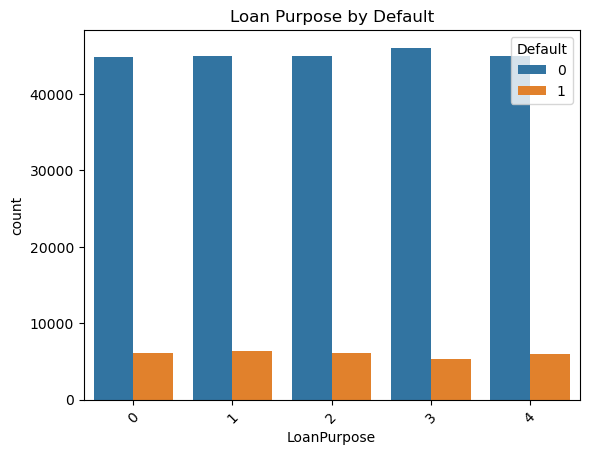

In [2]:
# EDA #

import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
print("Data Shape:", df.shape)
print("Default Rate:\n", df['Default'].value_counts(normalize=True))

# Plot 1: Default distribution
sns.countplot(x='Default', data=df)
plt.title("Loan Default Distribution")
plt.show()

# Plot 2: Income vs Default
sns.boxplot(x='Default', y='Income', data=df)
plt.title("Income vs Default")
plt.show()

# Plot 3: Loan Purpose vs Default
sns.countplot(x='LoanPurpose', hue='Default', data=df)
plt.title("Loan Purpose by Default")
plt.xticks(rotation=45)
plt.show()


In [3]:
# Split the Data

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Default'])
y = df['Default']

# Split before oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
# Applying SMOTE for Data Balance in Training set #

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())


Before SMOTE: Default
0    180555
1     23722
Name: count, dtype: int64
After SMOTE: Default
0    180555
1    180555
Name: count, dtype: int64


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define models with default parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", cm)



Logistic Regression
Accuracy: 0.6993342471118074
Precision: 0.22068761114404267
Recall: 0.627718765806778
F1 Score: 0.32656462435858075
Confusion Matrix:
 [[31992 13147]
 [ 2208  3723]]

Random Forest
Accuracy: 0.8389269629919718
Precision: 0.3066554338668913
Recall: 0.30686224919912325
F1 Score: 0.30675880667453226
Confusion Matrix:
 [[41024  4115]
 [ 4111  1820]]


F:\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
Accuracy: 0.8731544938319953
Precision: 0.39948548327820654
Recall: 0.18327432136233351
F1 Score: 0.2512713823393435
Confusion Matrix:
 [[43505  1634]
 [ 4844  1087]]


In [6]:
# Adding HyperParameters

models = {
    'Logistic Regression': LogisticRegression(C=0.5, solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, eval_metric='logloss', random_state=42),
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", cm)



Logistic Regression
Accuracy: 0.6993538280791071
Precision: 0.22070069357993954
Recall: 0.627718765806778
F1 Score: 0.3265789473684211
Confusion Matrix:
 [[31993 13146]
 [ 2208  3723]]

Random Forest
Accuracy: 0.7271000587429018
Precision: 0.231197958635509
Recall: 0.5805091890069128
F1 Score: 0.3306920232435288
Confusion Matrix:
 [[33690 11449]
 [ 2488  3443]]

XGBoost
Accuracy: 0.846543959271588
Precision: 0.33420320111343077
Recall: 0.3238914179733603
F1 Score: 0.3289665211062591
Confusion Matrix:
 [[41312  3827]
 [ 4010  1921]]


In [7]:
#from interpret.glassbox import ExplainableBoostingClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# train EBM model
#ebm = ExplainableBoostingClassifier(random_state=42)
#ebm.fit(X_train_bal, y_train_bal)

#y_pred_ebm = ebm.predict(X_test)

#print("\n Explainable Boosting Machine (EBM)")
#print("Accuracy:", accuracy_score(y_test, y_pred_ebm))
#print("Precision:", precision_score(y_test, y_pred_ebm))
#print("Recall:", recall_score(y_test, y_pred_ebm))
#print("F1 Score:", f1_score(y_test, y_pred_ebm))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ebm))


100%|===================| 51022/51070 [11:54<00:00]        


SHAP Global Feature Importance:


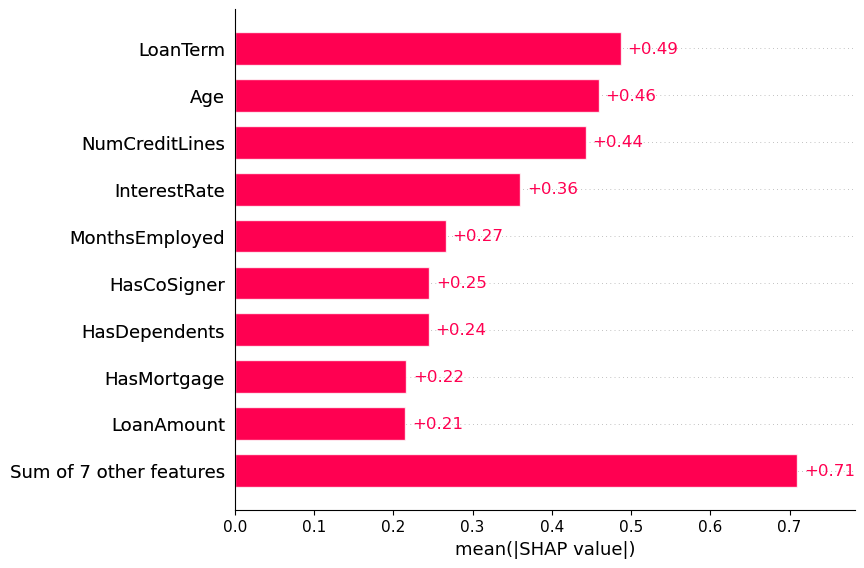


SHAP Local Explanation for first test instance:


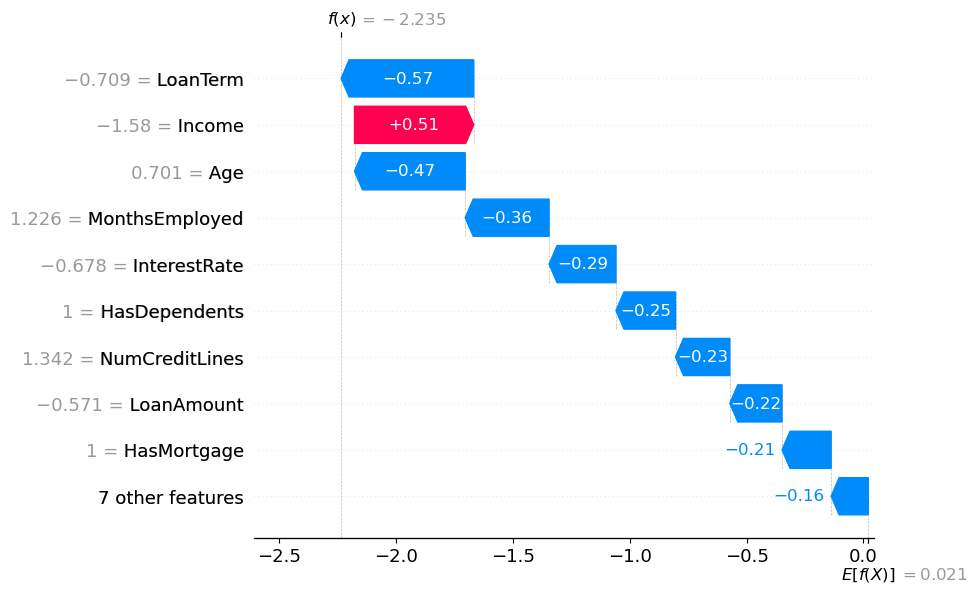

In [8]:
import shap
import matplotlib.pyplot as plt

# Use the XGBoost model you've already trained
xgb_model = models['XGBoost']  # assuming this is your trained model

# Create SHAP explainer for tree-based model
explainer = shap.Explainer(xgb_model, X_train_bal)

# Get SHAP values for test set
shap_values = explainer(X_test)

# Global explanation (feature importance)
print("\nSHAP Global Feature Importance:")
shap.plots.bar(shap_values)

# Local explanation (first prediction)
print("\nSHAP Local Explanation for first test instance:")
shap.plots.waterfall(shap_values[0])


In [9]:
import lime
import lime.lime_tabular
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Create LIME explainer (only needs to be done once)
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train_bal),
    feature_names = X_train.columns,
    class_names = ['No Default', 'Default'],
    mode = 'classification'
)
# Choose the same sample index you used in SHAP
i = 0  # index of test sample

# Get explanation
exp = explainer.explain_instance(
    data_row = X_test.iloc[i],
    predict_fn = models['XGBoost'].predict_proba
)

# Result (in Jupyter notebook)
exp.show_in_notebook(show_table=True)

# Result saved as HTML file
exp.save_to_file('lime_explanation.html')

print("LIME Explanation (Top Features):")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.3f}")


LIME Explanation (Top Features):
Age > 0.60: -0.021
InterestRate <= -0.65: -0.016
MonthsEmployed > 0.71: -0.012
0.00 < HasMortgage <= 1.00: -0.010
LoanTerm <= -0.71: -0.009
HasCoSigner <= 0.00: 0.007
NumCreditLines > 1.00: 0.007
0.00 < HasDependents <= 1.00: -0.005
Income <= -1.04: 0.004
CreditScore > 0.80: -0.004


In [10]:
# Get SHAP values for a single test instance
import shap
import numpy as np

# Create SHAP explainer (assume XGBoost is your chosen model)
explainer = shap.Explainer(models['XGBoost'], X_train_bal)
shap_values = explainer(X_test)

# Pick a sample to explain
i = 0  # You can make this dynamic or select from UI

# Get top 3 features based on SHAP magnitude
sample = shap_values[i]
top_idxs = np.argsort(np.abs(sample.values))[-3:][::-1]  # Top 3 impactful

# Build prompt lines
explanation_lines = []
for idx in top_idxs:
    feature = sample.feature_names[idx]
    value = round(sample.data[idx], 2)
    impact = sample.values[idx]
    direction = "increased" if impact > 0 else "reduced"
    explanation_lines.append(f"• {feature} (value: {value}) {direction} the default risk.")

# Combine into final prompt
prompt = "Explain the loan decision to a non-technical user based on the following:\n\n"
prompt += "\n".join(explanation_lines)
prompt += "\n\nUse friendly, clear language in 2–3 sentences."


100%|===================| 51013/51070 [12:24<00:00]        

In [13]:
from dotenv import load_dotenv
import os
from openai import OpenAI

load_dotenv(dotenv_path="./example.env")

api_key = os.getenv("OPENAI_API_KEY")